In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim import SGD
import matplotlib.pyplot as plt

## Download Dataset

In [2]:
# Use ToTensor to convert PIL Image or numpy array to torch.Tensor and normalize (0-1)
dataset = FashionMNIST(root='', train=True, transform=transforms.ToTensor(), download=True) 

# Create dataloader for batch management and set batch_size
trainloader = DataLoader(dataset=dataset, batch_size=30) 

## Visualize Your Data

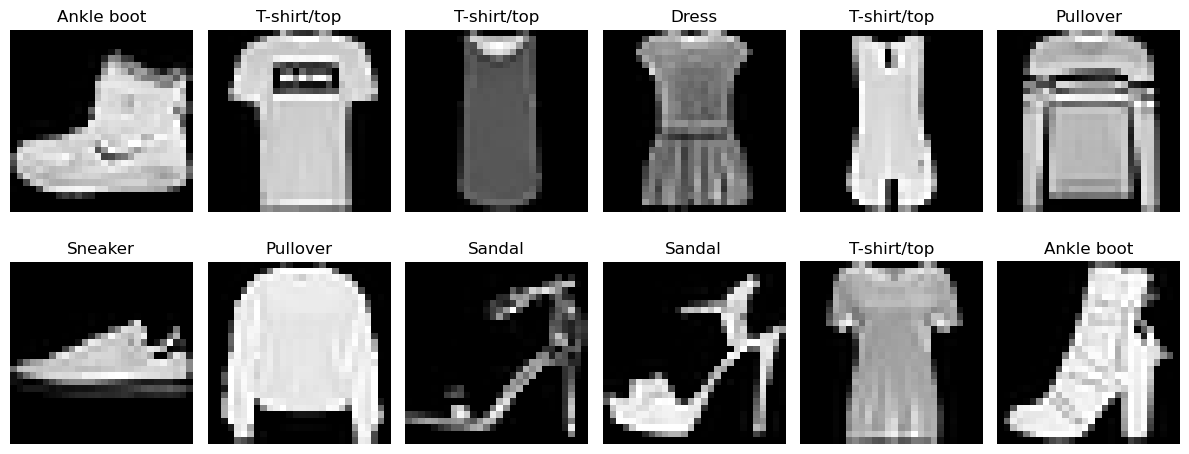

In [3]:
# Define the class names for the FashionMNIST dataset
class_names = FashionMNIST.classes

# Get a batch of images and labels from the DataLoader
data_iter = iter(trainloader)
images, labels = next(data_iter)

# Convert the tensor images back to numpy for plotting
images = images.numpy()

# Plot a batch of images (e.g. 6 images in 2 rows)
fig, axes = plt.subplots(2, 6, figsize=(12, 5))
axes = axes.ravel()  # Flatten the 2D array of axes for easier iteration

for i in range(12):  # Visualize 12 images from the batch
    image = images[i].squeeze()  # Squeeze to remove single color channel (grayscale)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(class_names[labels[i].item()])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Create Your Model 

In [3]:
class MLP(nn.Module):

    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, output_size)
        
        ### YOU CAN TRY THIS
        # self.nn = nn.ModuleList([
        #     nn.Linear(input_size, 512),
        #     nn.ReLU(),
        #     nn.Linear(512, 256),
        #     nn.ReLU(),
        #     nn.Linear(256, output_size),
        # ])
    
    # Forward
    def forward(self, x):

        z_1 = self.fc1(x)    # W_{1}x + b_{1} 
        a_1 = F.relu(z_1)    # relu(z_{1})
        z_2 = self.fc2(a_1)  # W_{2}a_{1} + b_{2} 
        a_2 = F.relu(z_2)    # relu(z_{2})
        z_3 = self.fc3(a_2)  # W_{3}a_{2} + b_{3} 

        return z_3


## Training

In [4]:
#Set your device to gpu or cpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize model, loss function, optimizer and number of epochs
model = MLP(input_size=28*28, output_size=10)
model = model.to(device) # Move model to your device
optimizer = SGD(params=model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
epochs = 10

In [ ]:
#Training loop
for epoch in range(epochs):

    for idx, (batch, label) in enumerate(trainloader):

        batch   = batch.to(device) #Batch to device
        label   = label.to(device) #Label tensors to device

        output = model(batch.view(batch.size(0), -1))

        optimizer.zero_grad()  
        loss   = criterion(output, label)
        loss.backward() #Compute gradients
        optimizer.step() #Update weights

        if idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, idx * len(batch), len(trainloader),
                100. * idx / len(trainloader), loss.item()))

In [ ]:
torch.save(model.state_dict(), 'f-mnist.pt')